In [169]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [170]:
def flip():
    if np.random.rand() > 0.5:
        return 0  # head
    else:
        return 1  # tail

def flip_10():
    res = np.zeros(10)
    for i in range(10):
        res[i] = flip()
    return (res == 0).astype(float).mean()

In [171]:
# Result for one run
def single_run(num_coins=1000):
    run_flip = [flip_10() for _ in range(num_coins)]
    # run_flip = np.round(np.random.rand(num_coins), 1)
    # nu_1
    nu_1 = run_flip[0]

    # nu_rand
    nu_rand = np.random.choice(run_flip)

    # nu_min
    nu_min = np.min(run_flip)

    return nu_1, nu_rand, nu_min

In [172]:
N = 100000
list_1 = np.zeros(N)
list_rand = np.zeros(N)
list_min = np.zeros(N)

for i in tqdm(range(N)):
    nu_1, nu_rand, nu_min = single_run()
    list_1[i] = nu_1
    list_rand[i] = nu_rand
    list_min[i] = nu_min


100%|██████████| 100000/100000 [48:12<00:00, 34.57it/s]


(array([6287., 3713.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

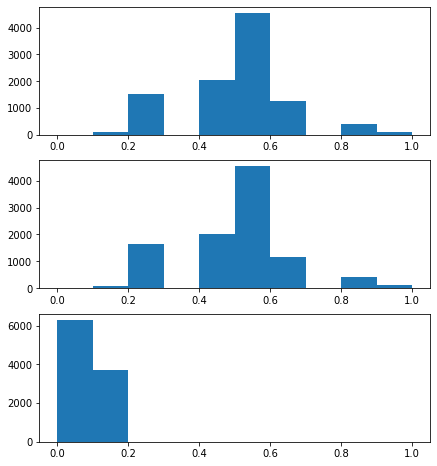

In [144]:
# plot histograms
fig, axes = plt.subplots(3, 1, figsize=(7, 8))
axes[0].hist(list_1, range=(0,1), bins=10)
axes[1].hist(list_rand, range=(0,1), bins=10)
axes[2].hist(list_min, range=(0,1), bins=10)

In [176]:
# P(|v-0.5| > eps)
# v > 0.5+eps or v < 0.5-eps

def plot_bound(list_num, mu=0.5, **kwargs):
    _end = 0.45
    eps = np.linspace(0, _end, 100)
    n_size = len(list_num)
    x = np.zeros(len(eps))
    for i in range(len(eps)):
        e = eps[i]
        val = np.count_nonzero(list_num > (mu + e)) + np.count_nonzero(list_num < (mu - e))
        x[i] = val / n_size

    # plt.figure()
    plt.plot(eps, x, **kwargs)


In [177]:
eps = np.array([0.1, 0.2, 0.3])
z = (list_1.reshape(len(list_1), 1) > eps)
# np.count_nonzero(z)
z.shape

(100000, 3)

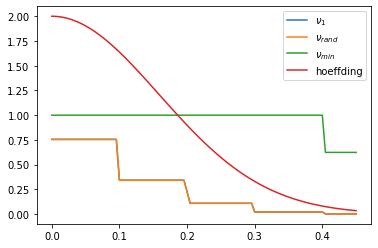

In [182]:
plot_bound(list_1, label=r'$\nu_1$')
plot_bound(list_rand, label=r'$\nu_{{rand}}$')
plot_bound(list_min, label=r'$\nu_{{min}}$')

x_hoff = np.linspace(0, 0.45, 100)
hoff = 2 * np.exp(-2*(x_hoff**2)*10)
plt.plot(x_hoff, hoff, label=r'hoeffding')
plt.legend()